<a href="https://colab.research.google.com/github/DharmikPatel916/CE888/blob/main/Praticals/Week%202/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as st


In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  sam=np.random.choice(x, size=(n_bootstraps, sample_size), replace=True, p=None)
  data_mean=np.mean(sam)
  av= np.mean(sam, axis=1)
  per=np.percentile(av, [(100-95)/2,100-((100-95)/2)], axis=None, out=None) 
  lower=per[0]
  upper=per[len(per)-1]
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

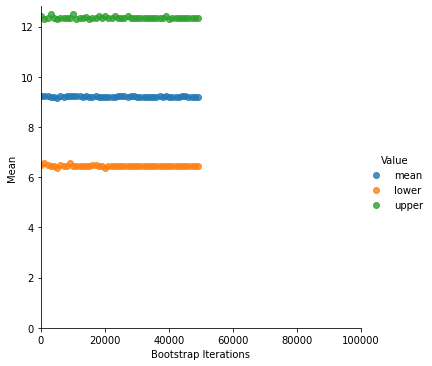

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  sam=np.random.choice(sample, size=(n_bootstraps, sample_size), replace=True, p=None)
  data_mean=np.mean(sam)
  av= np.mean(sam, axis=1)
  per=np.percentile(av, [(100-ci)/2,100-((100-ci)/2)], axis=None, out=None)

#standard deviation
  # data_std= np.std(sam)                        
  # std_row= np.std(sam, axis=1)
  #per=np.percentile(std_row, [(100-ci)/2,100-((100-ci)/2)], axis=None, out=None) 
  
  lower=per[0]
  upper=per[len(per)-1]
  print(per)
  return data_mean, lower, upper      #while using standard deviation return change with data_std

	

1
[7.5 7.5]
1001
[ 7.21428571 11.57142857]
2001
[ 7.14285714 11.42857143]
3001
[ 7.  11.5]
4001
[ 7.07142857 11.42857143]
5001
[ 7.07142857 11.42857143]
6001
[ 7.14285714 11.5       ]
7001
[ 7.         11.42857143]
8001
[ 7.07142857 11.42857143]
9001
[ 7.07142857 11.5       ]
10001
[ 7.07142857 11.5       ]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

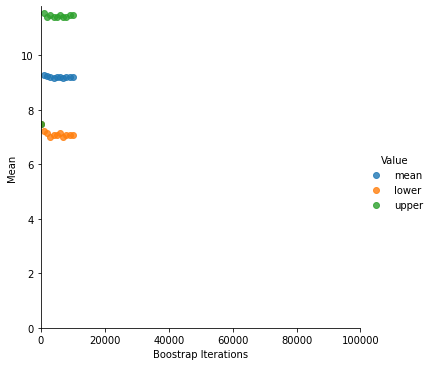

In [ ]:
boots = []
for i in range(1, 10002, 1000):
    print(i)
    boot = bootstrap_mean_ci(data, data.shape[0], i, 85)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_f1 = df.values.T[0]
data_f2t = df.values.T[1]
data_f2=data_f2t[:79]

In [ ]:
boots = []
for i in range(1, 10002, 1000):
    print(i)
    boot = bootstrap_mean_ci(data_f1, data_f1.shape[0], i, 73)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

1
[6.64523336 6.64523336]
1001
[6.06699053 6.71307695]
2001
[6.05636605 6.67409225]
3001
[6.0540407 6.6969747]
4001
[6.06438735 6.70356316]
5001
[6.05447228 6.69047136]
6001
[6.05078692 6.69591494]
7001
[6.05915901 6.70565606]
8001
[6.05934533 6.69675795]
9001
[6.06139457 6.70999853]
10001
[6.06673265 6.70058628]


In [ ]:
x=[]
for i in range(249):
  x.append(i)

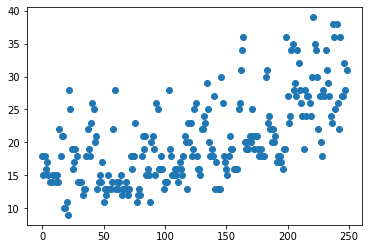

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, data_f1)
plt.show()

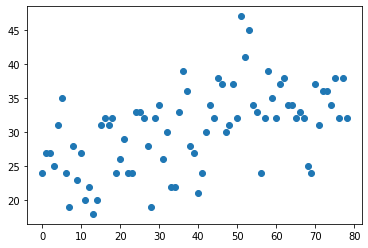

In [ ]:
plt.scatter(x, data_f2t)
plt.show()

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# <---INSERT YOUR CODE HERE--->
mf1=np.mean(data_f1)
mf2=np.mean(data_f2)
bf1=bootstrap_mean_ci(data_f1, data_f1.shape[0], 100, 95)
bf2=bootstrap_mean_ci(data_f2, data_f2.shape[0], 100, 95)

[19.26285141 20.93985944]
[29.30981013 31.56677215]


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    c=0
    to=np.mean(sample2)-np.mean(sample1)
    # print(np.mean(sample1))
    # print(np.mean(sample2))
    # print(to)
    concat = np.concatenate((sample1, sample2))
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      psample1 = perm[:int(len(sample1))]
      psample2 = perm[int(len(sample1)):]
      tp=np.mean(psample2)-np.mean(psample1)
      # print(tp)
      if tp>to:
        c+=1
    pvalue=c/n_permutations
    # print(pvalue)
    return pvalue

In [ ]:
p=permut_test(data_f1,data_f2,30000)

In [ ]:
#voting_data.py 
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [ ]:
print(len(dem_share_PA))
print(len(dem_share_OH))

67
88


In [ ]:
print(np.mean(dem_share_PA))
print(np.mean(dem_share_OH))

45.476417910447765
44.31818181818182


In [ ]:
boots = []
for i in range(1, 100002 , 1000):
    print(i)
    boot = bootstrap_mean_ci(np.array(dem_share_PA), np.array(dem_share_PA).shape[0], i, 98)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

1
[44.95597015 44.95597015]
1001
[42.84074627 48.27701493]
2001
[42.86925373 48.22507463]
3001
[42.82746269 48.49865672]
4001
[42.86970149 48.24029851]
5001
[42.85537313 48.32970149]
6001
[42.78895522 48.30447761]
7001
[42.87014925 48.4019403 ]
8001
[42.81970149 48.42447761]
9001
[42.79       48.34238806]
10001
[42.74343284 48.3541791 ]
11001
[42.72283582 48.25358209]
12001
[42.78373134 48.36014925]
13001
[42.75731343 48.39955224]
14001
[42.7958209  48.31671642]
15001
[42.80746269 48.2458209 ]
16001
[42.79985075 48.28746269]
17001
[42.83149254 48.34701493]
18001
[42.79313433 48.28223881]
19001
[42.81686567 48.39835821]
20001
[42.77597015 48.31746269]
21001
[42.79626866 48.36268657]
22001
[42.80970149 48.29537313]
23001
[42.80268657 48.31029851]
24001
[42.80447761 48.34373134]
25001
[42.79164179 48.30208955]
26001
[42.79134328 48.27835821]
27001
[42.84492537 48.35059701]
28001
[42.76671642 48.37149254]
29001
[42.82179104 48.30328358]
30001
[42.79104478 48.37746269]
31001
[42.81432836 48

In [ ]:
boots = []
for i in range(1, 100002 , 1000):
    print(i)
    boot = bootstrap_mean_ci(np.array(dem_share_OH), np.array(dem_share_OH).shape[0], i, 98)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

1
[42.655 42.655]
1001
[42.10943182 46.8125    ]
2001
[41.78863636 46.81704545]
3001
[41.79704545 46.68977273]
4001
[41.90102273 46.73284091]
5001
[41.79602273 46.75704545]
6001
[41.82136364 46.77011364]
7001
[41.90011364 46.75136364]
8001
[41.95761364 46.80204545]
9001
[41.89602273 46.78409091]
10001
[41.86306818 46.72329545]
11001
[41.83090909 46.70136364]
12001
[41.86784091 46.72147727]
13001
[41.86238636 46.76829545]
14001
[41.88590909 46.74386364]
15001
[41.84159091 46.71147727]
16001
[41.87806818 46.76352273]
17001
[41.85715909 46.76159091]
18001
[41.88909091 46.73659091]
19001
[41.89613636 46.70988636]
20001
[41.84363636 46.73920455]
21001
[41.91386364 46.75068182]
22001
[41.88204545 46.71738636]
23001
[41.86454545 46.71272727]
24001
[41.86852273 46.73386364]
25001
[41.86431818 46.68568182]
26001
[41.88261364 46.77068182]
27001
[41.85545455 46.77931818]
28001
[41.89136364 46.73113636]
29001
[41.82659091 46.76      ]
30001
[41.86943182 46.79170455]
31001
[41.87011364 46.72579545]

In [ ]:
print(permut_test(dem_share_PA,dem_share_OH,30000))

0.7622
